In [1]:
from ANN import MLPModel , F1Dataset, NN_Eval
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
import torch.optim as optim

In [2]:
df_cleaned=pd.read_csv('Processed_DATA_PITSTRAT.csv')

def preprocess(df_cleaned):

    input_data = df_cleaned[['circuitId', 'raceId', 'points', 'lap','position','laps']].values
    target_data = df_cleaned['stop'].values

    scaler = StandardScaler()
    input_data[:, 2:] = scaler.fit_transform(input_data[:, 2:])

    circuit_encoded = F.one_hot(torch.tensor(input_data[:, 0],dtype=torch.long), num_classes=81)
    race_encoded = F.one_hot(torch.tensor(input_data[:, 1],dtype=torch.long), num_classes=1133)
    points = torch.tensor(input_data[:, 2], dtype=torch.float32).unsqueeze(1)
    lap = torch.tensor(input_data[:, 3], dtype=torch.float32).unsqueeze(1)
    position = torch.tensor(input_data[:, 4], dtype=torch.float32).unsqueeze(1)
    laps = torch.tensor(input_data[:, 5], dtype=torch.float32).unsqueeze(1)


    input_data_encoded = torch.cat([circuit_encoded, race_encoded, points, lap,position,laps], dim=1)
    target_encoded = F.one_hot(torch.tensor(target_data,dtype=torch.long), num_classes=8)
    return input_data_encoded,target_encoded

In [3]:
input_data_encoded,target_encoded=preprocess(df_cleaned)
X_train, X_test, y_train, y_test = train_test_split(input_data_encoded, target_encoded, test_size=0.2, random_state=42)
train_dataset = F1Dataset(X_train, y_train)
test_dataset = F1Dataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
best_loss = float('inf')
circuit_id_max = 81
race_id_max = 1133
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
weight_decay = 1e-5
criterion = nn.CrossEntropyLoss()



cuda


In [4]:
net = MLPModel(circuit_id_max=circuit_id_max, race_id_max=race_id_max,dropout_prob=0.2).to(device)
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=weight_decay)
Evaluate_ANN=NN_Eval(net,train_loader,test_loader)
Evaluate_ANN.train_model( optimizer, criterion, epochs=80, patience=15)
net=Evaluate_ANN.model


(Evaluate_ANN.Metric_nn(criterion,'cuda'))


Epoch [1/80], Loss: 1.6444 Validation loss: 1.2001
Epoch [2/80], Loss: 1.0791 Validation loss: 0.8534
Epoch [3/80], Loss: 0.8257 Validation loss: 0.6798
Epoch [4/80], Loss: 0.6705 Validation loss: 0.5431
Epoch [5/80], Loss: 0.6052 Validation loss: 0.5274
Epoch [6/80], Loss: 0.5682 Validation loss: 0.4812
Epoch [7/80], Loss: 0.4885 Validation loss: 0.4571
Epoch [8/80], Loss: 0.5023 Validation loss: 0.4255
Epoch [9/80], Loss: 0.4594 Validation loss: 0.4293
Epoch [10/80], Loss: 0.4901 Validation loss: 0.3991
Epoch [11/80], Loss: 0.4278 Validation loss: 0.3869
Epoch [12/80], Loss: 0.4309 Validation loss: 0.4102
Epoch [13/80], Loss: 0.4103 Validation loss: 0.4060
Epoch [14/80], Loss: 0.4122 Validation loss: 0.4030
Epoch [15/80], Loss: 0.4097 Validation loss: 0.4188
Epoch [16/80], Loss: 0.4031 Validation loss: 0.4257
Epoch [17/80], Loss: 0.4183 Validation loss: 0.3881
Epoch [18/80], Loss: 0.4068 Validation loss: 0.3977
Epoch [19/80], Loss: 0.4146 Validation loss: 0.3978
Epoch [20/80], Loss: 

0.4117625802755356

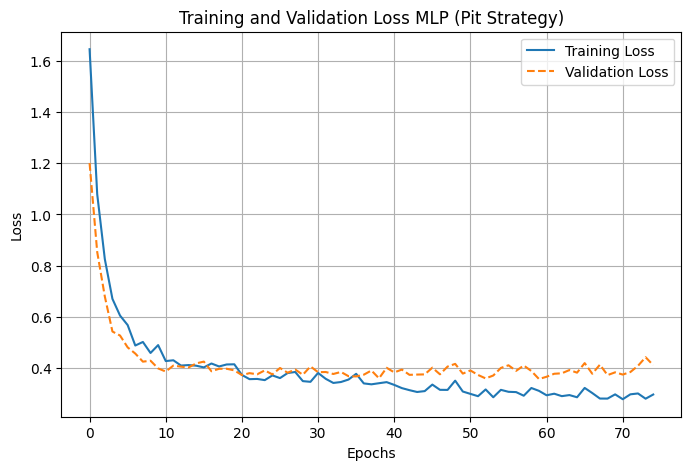

In [5]:
import matplotlib.pyplot as plt
def plot_loss(train_losses, val_losses):
    plt.figure(figsize=(8, 5))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss", linestyle="--")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss MLP (Pit Strategy)")
    plt.legend()
    plt.grid()
    plt.show()
plot_loss(Evaluate_ANN.train_losses, Evaluate_ANN.val_losses)